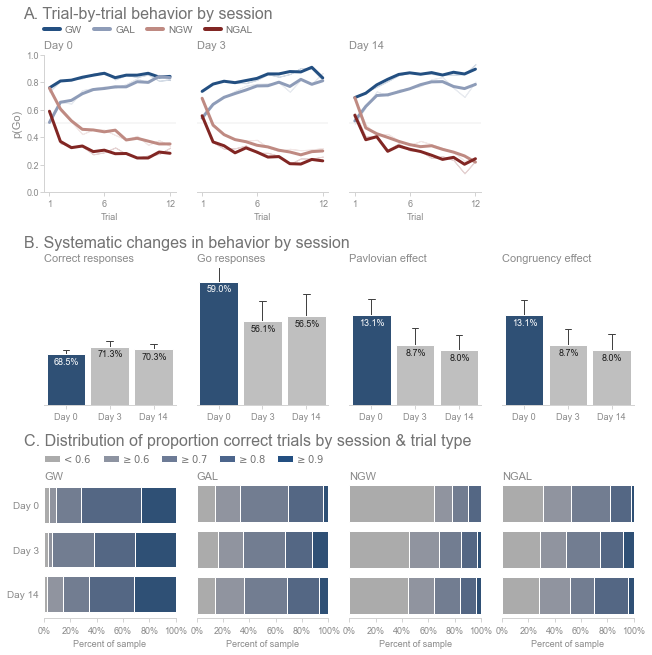

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import dirname
from pandas import read_csv, concat
sns.set_theme(style='ticks', context='notebook', font_scale=1.2, rc={'font.family': 'Arial'})
ROOT_DIR = dirname(dirname(dirname(os.path.realpath('__file__'))))
np.random.seed(47404)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define plot parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define variable ordering.
sessions = [1,2,3]
robots = ['gw','gal','ngw','ngal']

## Define palettes.
palette_1 = ['#234f81', '#8e9cb8', '#bf8a82', '#812623']
palette_2 = ['#234f81', '0.75', '0.75', '0.75']
palette_3 = ['#234f81', '#4c658c', '#6d7b96', '#8d93a1', '#ababab']

## Define labels.
labels = ['Day 0', 'Day 3', 'Day 14']

## Define axis styles.
labelcolor = '#737373'
tickcolor = '#8a8a8a'
axiscolor = '#d3d3d3'

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Initialize canvas.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize canvas.
fig = plt.figure(figsize=(9,9))

## Initialize gridspec.
gs = fig.add_gridspec(3, 4, left=0.07, right=0.98, top=0.92, bottom=0.05, 
                      hspace=0.55, wspace=0.16)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Load and prepare data.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Load data.
data = concat([read_csv(os.path.join(ROOT_DIR, 'study02', 'data', session, 'pgng.csv'))
               for session in ['s1','s2','s3']])

## Restrict participants.
reject = read_csv(os.path.join(ROOT_DIR, 'study02', 'data', 's1', 'reject.csv'))
data = data[data.subject.isin(reject.query('reject==0').subject)].reset_index(drop=True)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Panels 1a-d: Learning curves.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Main loop.
for i, session in enumerate(sessions):
    
    ## Initialize axis.
    ax = plt.subplot(gs[0,i])
    
    ## Plot learning curves.
    sns.lineplot(x='exposure', y='choice', hue='robot', data=data.query(f'session == {session}'), 
                 hue_order=robots, palette=palette_1, legend=False, errorbar=('ci', 95), lw=3, ax=ax,
                 n_boot=1)
    
    ## Add midway line.
    ax.axhline(0.5, color='k', alpha=0.05, zorder=-1)

    ## Adjust x-axis.
    ax.set(xlim=(0.5,12.5), xticks=[1,6,12])
    ax.set_xticklabels(ax.get_xticks(), color=tickcolor, fontsize=9)
    ax.set_xlabel('Trial', color=tickcolor, fontsize=9)
    
    ## Adjust y-axis.
    ax.set(ylim=(0,1), yticks=[], yticklabels=[], ylabel='')
    if not i: 
        ax.set_yticks(np.linspace(0,1,6))
        ax.set_yticklabels(ax.get_yticks().round(1), color=tickcolor, fontsize=9)
        ax.set_ylabel('p(Go)', color=tickcolor, fontsize=11)
        
    ## Adjust title.
    ax.set_title(labels[i], loc='left', color=tickcolor, fontsize=11)
        
    ## Adjust legend.
    if not i: 
        for color, label in zip(palette_1, robots): ax.plot([], [], color=color, label=label.upper(), lw=4)
        ax.legend(loc=2, bbox_to_anchor=(0, 1.21), ncol=4, frameon=False, labelcolor=labelcolor, fontsize=10,
                  borderpad=0, borderaxespad=0, handletextpad=0.5, handlelength=1.6, columnspacing=1.2)
        
    ## Modify ax spines.
    ax.yaxis.set_tick_params(pad=1)
    for side in ['left','bottom']: ax.spines[side].set(linewidth=1, color=axiscolor)
    ax.tick_params(bottom=True, left=True, color=axiscolor, length=4, width=1)
    if not i: sns.despine(ax=ax, left=False, right=True, top=True, bottom=False)
    else: sns.despine(ax=ax, left=True, right=True, top=True, bottom=False)
    
    ## Add annotation.
    if not i: ax.annotate('A. Trial-by-trial behavior by session', (0,0), (-0.16,1.24), 'axes fraction', 
                          ha='left', va='bottom', color=labelcolor, fontsize=16)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Panel 2a: Changes in accuracy.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    
## Initialize axis.
ax = plt.subplot(gs[1,0])

## Compute accuracy by participant & session.
pivot = data.pivot_table('accuracy', 'subject', 'session')
gb = pivot.melt(ignore_index=False, value_name='accuracy')

## Plot changes.
sns.barplot(x='session', y='accuracy', data=gb, palette=palette_2, errorbar=('ci', 95), 
            width=0.88, errwidth=1, capsize=0.15, zorder=5, ax=ax)

## Add percentages.
for i, v in enumerate(pivot.mean()): 
    ax.text(i + 0.015, v - 1e-2, '%0.1f%%' %(v*1e2), ha='center', va='top', 
            color='w' if not i else 'k', fontsize=9, zorder=10)    
    
## Add significance annotation.
# ax.plot([0,1], [0.94,0.94], color=labelcolor, lw=1)
# ax.plot([0,0], [0.93,0.94], color=labelcolor, lw=1)
# ax.plot([1,1], [0.93,0.94], color=labelcolor, lw=1)
    
## Adjust x-axis.
ax.set(xticks=np.arange(len(labels)), xlabel='')
ax.set_xticklabels(labels, color=tickcolor, fontsize=9)

## Adjust y-axis.
ax.set(ylim=(0.5, 1), yticks=[], ylabel='')

## Modify ax spines.
ax.yaxis.set_tick_params(pad=1)
ax.spines['bottom'].set(linewidth=1, color=axiscolor)
ax.tick_params(bottom=True, left=False, color=axiscolor, length=4, width=1)
sns.despine(ax=ax, left=True, right=True, top=True, bottom=False)

## Adjust title.
ax.set_title('Correct responses', loc='left', color=tickcolor, fontsize=11)

## Add annotation.
ax.annotate('B. Systematic changes in behavior by session', (0,0), (-0.15,1.13), 'axes fraction', 
            ha='left', va='bottom', color=labelcolor, fontsize=16)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Panel 2b: Changes in go bias.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    
## Initialize axis.
ax = plt.subplot(gs[1,1])

## Compute choice by participant & session.
pivot = data.pivot_table('choice', 'subject', 'session')
gb = pivot.melt(ignore_index=False, value_name='choice')

## Plot changes.
sns.barplot(x='session', y='choice', data=gb, palette=palette_2, errorbar=('ci', 95), 
            width=0.88, errwidth=1, capsize=0.15, zorder=5, ax=ax)

## Add percentages.
for i, v in enumerate(pivot.mean()): 
    ax.text(i + 0.015, v - 2e-3, '%0.1f%%' %(v*1e2), ha='center', va='top', 
            color='w' if not i else 'k', fontsize=9, zorder=10) 

## Adjust x-axis.
ax.set(xticks=np.arange(len(labels)), xlabel='')
ax.set_xticklabels(labels, color=tickcolor, fontsize=9)

## Adjust y-axis.
ax.set(ylim=(0.5, 0.6), yticks=[], ylabel='')

## Adjust title.
ax.set_title('Go responses', loc='left', color=tickcolor, fontsize=11)

## Modify ax spines.
ax.yaxis.set_tick_params(pad=1)
ax.spines['bottom'].set(linewidth=1, color=axiscolor)
ax.tick_params(bottom=True, left=False, color=axiscolor, length=4, width=1)
sns.despine(ax=ax, left=True, right=True, top=True, bottom=False)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Panel 2c: Changes in Pavlovian bias.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    
## Initialize axis.
ax = plt.subplot(gs[1,2])

## Compute choice by participant, session, and valence.
pivot = data.pivot_table('choice','subject',['valence','session'])
pivot = pivot['win'] - pivot['lose']
gb = pivot.melt(ignore_index=False, value_name='choice')

## Plot changes.
sns.barplot(x='session', y='choice', data=gb, palette=palette_2, errorbar=('ci', 95), 
            width=0.88, errwidth=1, capsize=0.15, zorder=5, ax=ax)

## Add percentages.
for i, v in enumerate(pivot.mean()): 
    ax.text(i + 0.015, v - 5e-3, '%0.1f%%' %(v*1e2), ha='center', va='top', 
            color='w' if not i else 'k', fontsize=9, zorder=10) 

## Adjust x-axis.
ax.set(xticks=np.arange(len(labels)), xlabel='')
ax.set_xticklabels(labels, color=tickcolor, fontsize=9)

## Adjust y-axis.
ax.set(ylim=(0.0, 0.2), yticks=[], ylabel='')

## Adjust title.
ax.set_title('Pavlovian effect', loc='left', color=tickcolor, fontsize=11)
# ax.annotate('p(Go | Win) - p(Go | Lose)', (0,0), (0,0.97), 'axes fraction', 
            # ha='left', va='top', color=tickcolor, fontsize=8)

## Modify ax spines.
ax.yaxis.set_tick_params(pad=1)
ax.spines['bottom'].set(linewidth=1, color=axiscolor)
ax.tick_params(bottom=True, left=False, color=axiscolor, length=4, width=1)
sns.despine(ax=ax, left=True, right=True, top=True, bottom=False)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Panel 2d: Changes in congruency bias.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    
## Initialize axis.
ax = plt.subplot(gs[1,3])

## Compute choice by participant, session, and valence.
pivot = data.pivot_table('accuracy','subject',['robot','session'])
pivot = pivot[['gw','ngal']].T.groupby(level=-1).mean().T -\
        pivot[['ngw','gal']].T.groupby(level=-1).mean().T
gb = pivot.melt(ignore_index=False, value_name='accuracy')

## Plot changes.
sns.barplot(x='session', y='accuracy', data=gb, palette=palette_2, errorbar=('ci', 95), 
            width=0.88, errwidth=1, capsize=0.15, zorder=5, ax=ax)

## Add percentages.
for i, v in enumerate(pivot.mean()): 
    ax.text(i + 0.015, v - 5e-3, '%0.1f%%' %(v*1e2), ha='center', va='top', 
            color='w' if not i else 'k', fontsize=9, zorder=10) 

## Adjust x-axis.
ax.set(xticks=np.arange(len(labels)), xlabel='')
ax.set_xticklabels(labels, color=tickcolor, fontsize=9)

## Adjust y-axis.
ax.set(ylim=(0.0, 0.2), yticks=[], ylabel='')

## Adjust title.
ax.set_title('Congruency effect', loc='left', color=tickcolor, fontsize=11)
# ax.annotate('p(Go | GW, NGAL) - p(Go | NGW, GAL)', (0,0), (0,0.97), 'axes fraction', 
            # ha='left', va='top', color=tickcolor, fontsize=8)

## Modify ax spines.
ax.yaxis.set_tick_params(pad=1)
ax.spines['bottom'].set(linewidth=1, color=axiscolor)
ax.tick_params(bottom=True, left=False, color=axiscolor, length=4, width=1)
sns.despine(ax=ax, left=True, right=True, top=True, bottom=False)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Panels 3a-d: Individual differences.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Compute accuracy by participant / session / condition.
gb = data.groupby(['subject','session','robot']).accuracy.mean().reset_index()

## Score performance into top five deciles.
gb['score'] = np.digitize(gb.accuracy, np.arange(0.6,1.0,0.1))

## Calculate proportion of participants in each bin.
gb = gb.groupby(['robot','session','score']).subject.count().reset_index()
gb['prop'] = gb.groupby(['robot','session']).subject.transform(lambda x: x / x.sum())
gb['cumprop'] = gb.groupby(['robot','session']).prop.transform(np.cumsum)

## Iteratively plot.
for i, robot in enumerate(robots):

    ## Initialize axis.
    ax = plt.subplot(gs[2,i])
    
    ## Stacked barchart. 
    for score, color in zip(np.unique(gb.score)[::-1], palette_3):    
    
        ## Plot scores.
        q = f'robot == "{robot}" and score == {score}'
        sns.barplot(x='cumprop', y='session', data=gb.query(q), order=sessions, 
                    palette=np.repeat(color, 4), orient='h', ax=ax)
    
    ## Annotations.
    # for y, session in enumerate(sessions):
    #     v = gb.set_index(['robot','session','score']).loc[(robot,session,4)].prop
    #     ax.annotate('%0.1f%%' %(v*1e2), (0,0), (1-v/2, y), ha='center', va='center',
    #                 color='w', fontsize=9.5)
    
    ## Adjust x-axis.
    ax.set(xlim=(0,1), xticks=np.linspace(0,1,6))
    ax.set_xticklabels(['%0.0f%%' %p for p in np.linspace(0,1e2,6)], fontsize=9, color=tickcolor)
    ax.set_xlabel('Percent of sample', fontsize=9, color=tickcolor)

    ## Adjust y-axis.
    ax.set(ylabel='', yticks=np.arange(len(sessions)), yticklabels=[])
    if not i: ax.set_yticklabels(labels, ha='right', fontsize=10, color=tickcolor)
    
    ## Adjust title.
    ax.set_title(robot.upper(), loc='left', color=tickcolor, fontsize=11, pad=0)
    
    ## Adjust legend.
    if not i:
        scores = [r'$<0.6$', r'$\geq0.6$', r'$\geq0.7$', r'$\geq0.8$', r'$\geq0.9$']
        for score, color in zip(scores, palette_3[::-1]): ax.barh(0, 0, color=color, label=score)
        ax.legend(loc=2, bbox_to_anchor=(0, 1.21), ncol=5, frameon=False, labelcolor=labelcolor, fontsize=10,
                  borderpad=0, borderaxespad=0, handletextpad=0.2, handlelength=1.6, columnspacing=1.1)
    
    ## Modify ax spines.
    ax.yaxis.set_tick_params(pad=1)
    ax.spines['bottom'].set(linewidth=1, color=axiscolor)
    ax.tick_params(bottom=True, left=False, color=axiscolor, length=4, width=1)
    sns.despine(ax=ax, left=True, right=True, top=True, bottom=False)
    
    ## Add annotation.
    if not i: ax.annotate('C. Distribution of proportion correct trials by session & trial type', (0,0), (-0.15,1.24), 'axes fraction', 
                          ha='left', va='bottom', color=labelcolor, fontsize=16)
    
## Save figure.
plt.savefig(os.path.join(ROOT_DIR, 'figures', 'fig05.png'), dpi=100)